In [ ]:
# Produce several charts, including one or more maps
# Upload each Jupyter Notebook along with the associated census data file to your group repo

# Geographical Distribution Analysis of Car Ownership in LA County
#### Simon Han

## Introduction

In this analysis, we aim to explore the geographical distribution of car ownership in Los Angeles (LA) County. The objective is to evaluate transit needs using various variables, including whether or not a person owns a car. We'll be using a dataset containing information on car ownership at the census tract level.

## Data Loading and Merging

In [2]:
# Import Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [36]:
# Load the data
census_df = pd.read_csv('Data/US_Census_LA_County.csv', dtype={'FIPS':str})
without_vehicle_gdf = gpd.read_file('Data/Without_Vehicle.geojson')

/tmp/ipykernel_503/2262103094.py:2: DtypeWarning: Columns (294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,320,321,322) have mixed types. Specify dtype option on import or set low_memory=False.
  census_df = pd.read_csv('Data/US_Census_LA_County.csv', dtype={'FIPS':str})


In [53]:
print(census_df.columns)
print(without_vehicle_gdf.columns) 

Index(['GEO_ID', 'FIPS', 'NAME', 'DP1_0001C', 'DP1_0002C', 'DP1_0003C',
       'DP1_0004C', 'DP1_0005C', 'DP1_0006C', 'DP1_0007C',
       ...
       'DP1_0151P', 'DP1_0152P', 'DP1_0153P', 'DP1_0154P', 'DP1_0155P',
       'DP1_0156P', 'DP1_0157P', 'DP1_0158P', 'DP1_0159P', 'DP1_0160P'],
      dtype='object', length=323)
Index(['tract', 'no_vehicle', 'no_vehicle_universe', 'no_vehicle_pct',
       'sup_dist', 'csa', 'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length',
       'geometry'],
      dtype='object')


In [61]:
census_df2 = census_df [['FIPS', 'NAME']]

In [103]:
# Merge the datasets on the FIPS code
merged_gdf = without_vehicle_gdf.merge(census_df2, right_on='FIPS', left_on='tract', how='inner')
print(merged_gdf.columns)

Index(['tract', 'no_vehicle', 'no_vehicle_universe', 'no_vehicle_pct',
       'sup_dist', 'csa', 'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length',
       'geometry', 'FIPS', 'NAME'],
      dtype='object')


## Dataset Exploration and Visualization

In [104]:
# Basic summary statistics
summary_statistics = merged_gdf['no_vehicle_pct'].describe()
print(summary_statistics)

count    2471.000000
mean        8.784581
std         8.966272
min         0.000000
25%         2.800000
50%         6.100000
75%        11.800000
max        82.100000
Name: no_vehicle_pct, dtype: float64


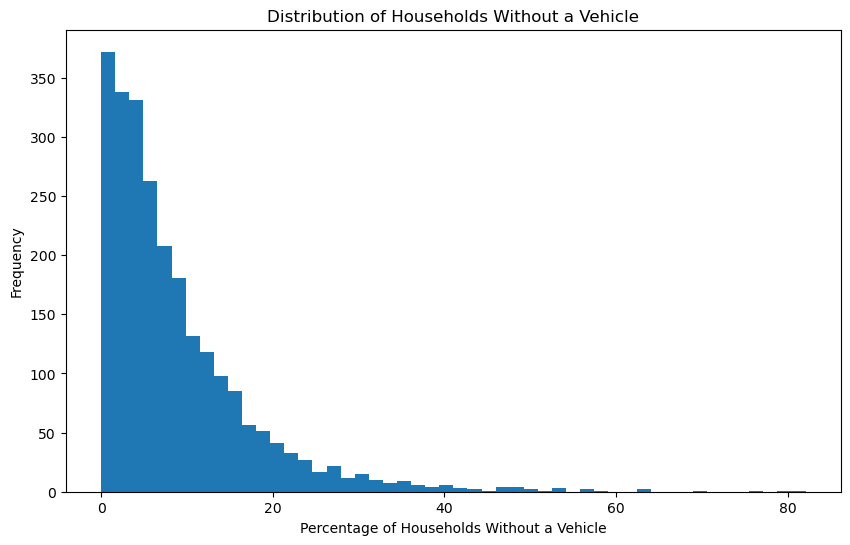

In [105]:
# Histogram of the percentage of households without a vehicle
plt.figure(figsize=(10, 6))
plt.hist(merged_gdf['no_vehicle_pct'], bins=50)
plt.title('Distribution of Households Without a Vehicle')
plt.xlabel('Percentage of Households Without a Vehicle')
plt.ylabel('Frequency')
plt.show()

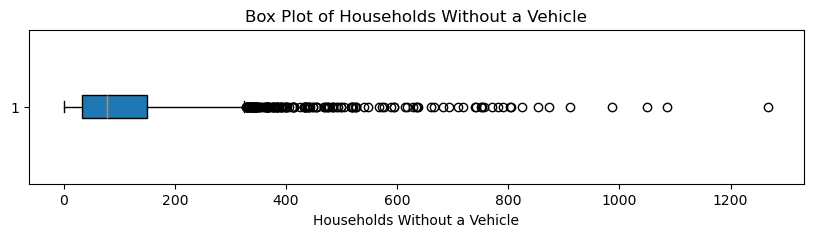

In [106]:
# Box plot
plt.figure(figsize=(10, 2))
plt.boxplot(merged_gdf['no_vehicle'], vert=False, patch_artist=True)
plt.title('Box Plot of Households Without a Vehicle')
plt.xlabel('Households Without a Vehicle')
plt.show()

In [107]:
type(merged_gdf)

geopandas.geodataframe.GeoDataFrame

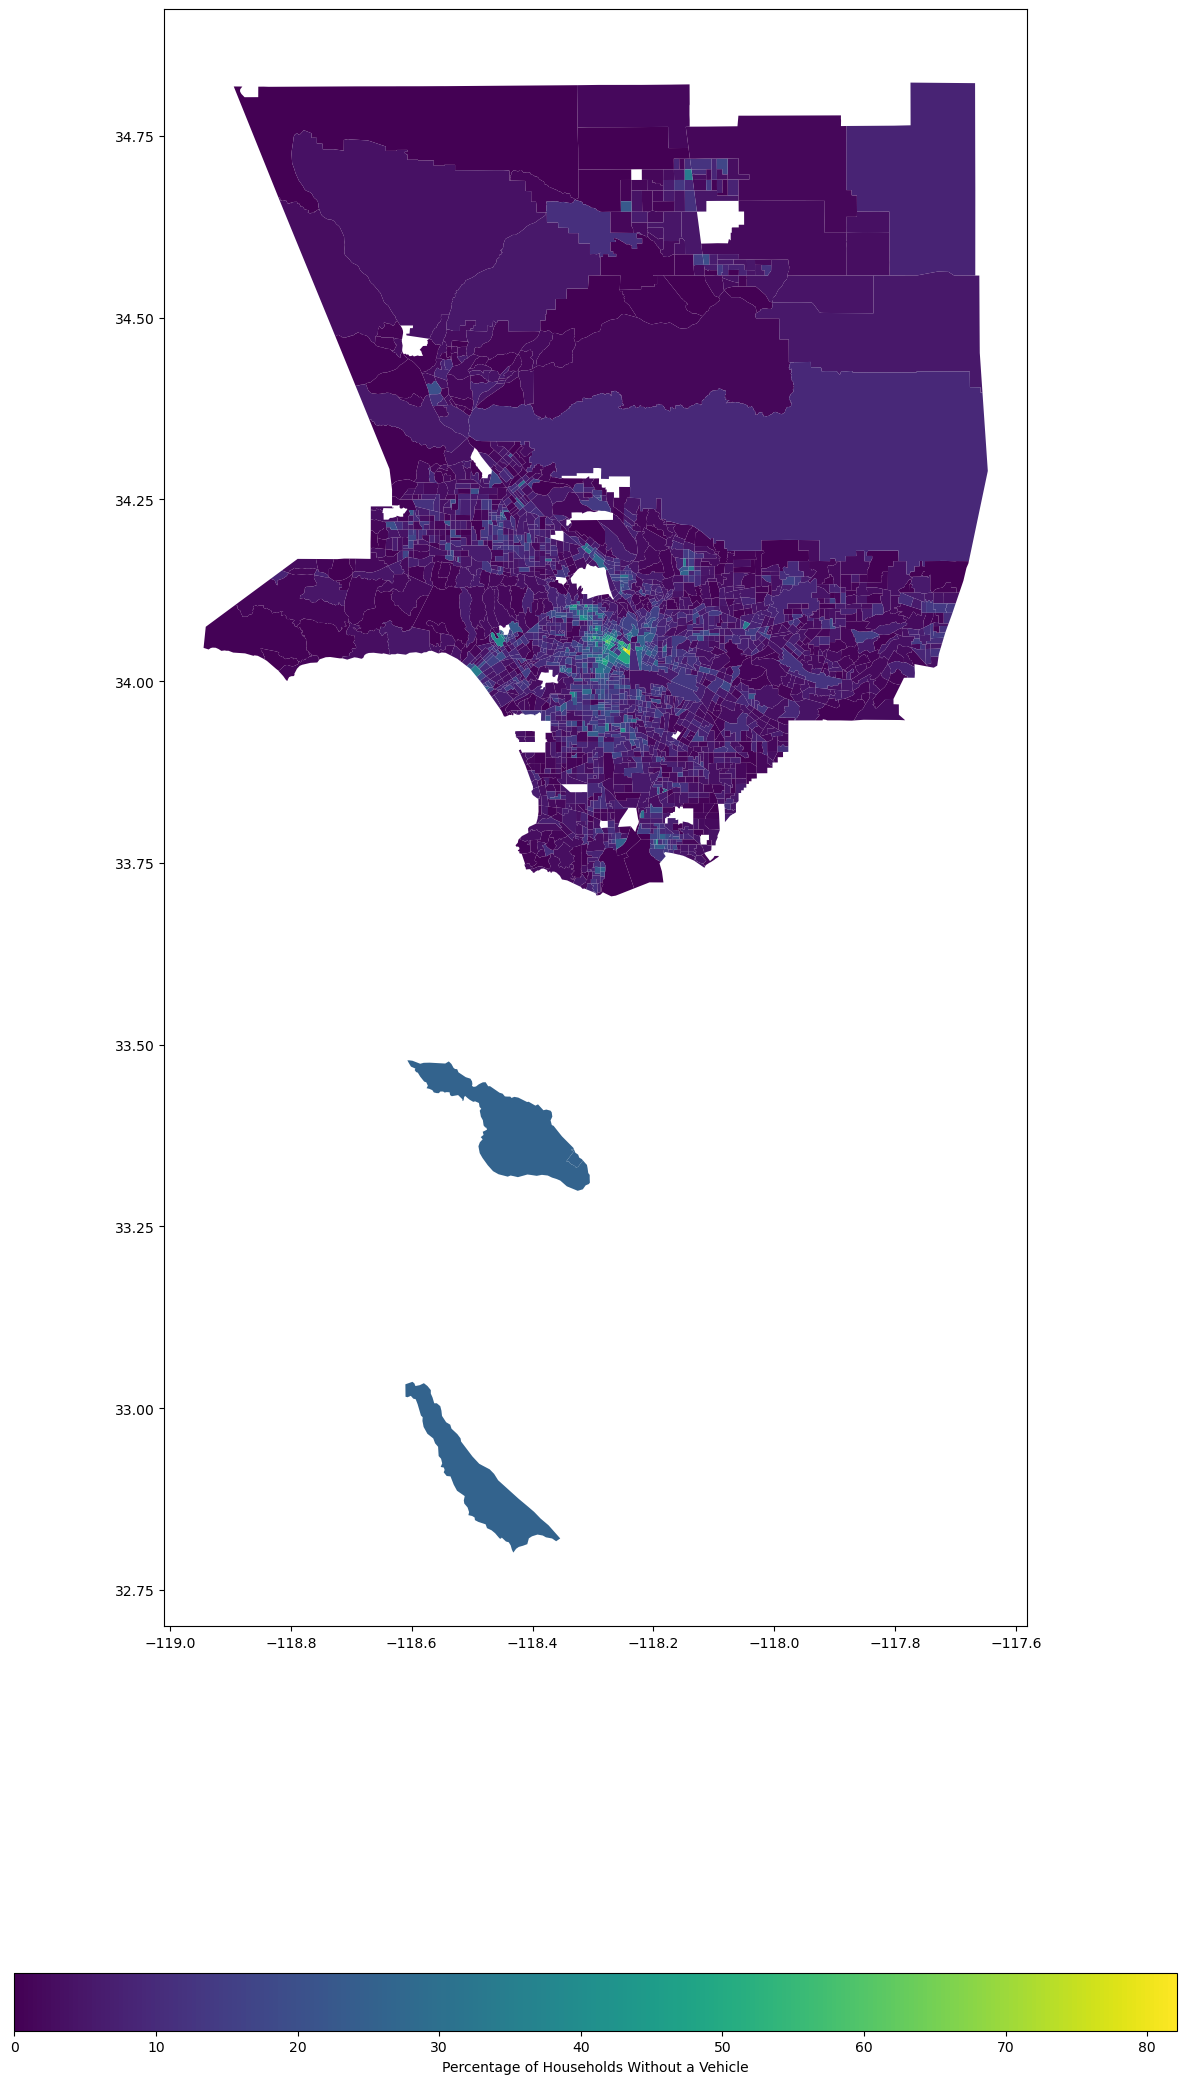

In [115]:
# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
merged_gdf.plot(column='no_vehicle_pct', ax=ax, legend=True,
                legend_kwds={'label': "Percentage of Households Without a Vehicle",
                             'orientation': "horizontal"})
plt.show()

## Summary

In this study, we find that Boyle Heights and Arts District area have the lowest car ownership in LA county. This finding informs our research on Transit Deserts.